<a href="https://colab.research.google.com/github/pymoux/wildfires_discovery/blob/main/wildfires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

%matplotlib inline

# **Import data**

1.   **original source of data**

https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires

Fires: Table including wildfire data for the period of 1992-2015 compiled from US federal, state, and local reporting systems.


2.   **additional source of data**

https://www.fs.usda.gov/rds/archive/catalog/RDS-2013-0009.6

The same database with 500,000 rows and 5 more years.

In [ ]:
# Read sqlite query results into a pandas DataFrame

db_file_15 = "/content/drive/MyDrive/DST_Wildfires/2015/FPA_FOD_20170508.sqlite"
db_file_20 = "/content/drive/MyDrive/DST_Wildfires/2020/FPA_FOD_20221014.sqlite"

con = sqlite3.connect(db_file_15)
df = pd.read_sql_query("SELECT * from Fires", con, index_col='OBJECTID')

con.close()

# **Import fields description**

In [ ]:
# Read variables csv file to get descriptions
desc = pd.read_csv("/content/drive/MyDrive/DST_Wildfires/2020/_variable_descriptions.csv")

In [ ]:
query = "FIPS_CODE"
desc.loc[desc["Variable"] == query, "Description"].values.item()

'Five-digit code from the Federal Information Process Standards (FIPS) publication 6-4 for representation of counties and equivalent entities, based on the nominal designation in the fire report (not from a spatial overlay).'

# **First data exploration**

In [ ]:
# dataframe information
df.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880465 entries, 1 to 1880465
Data columns (total 38 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   FOD_ID                      1880465 non-null  int64  
 1   FPA_ID                      1880465 non-null  object 
 2   SOURCE_SYSTEM_TYPE          1880465 non-null  object 
 3   SOURCE_SYSTEM               1880465 non-null  object 
 4   NWCG_REPORTING_AGENCY       1880465 non-null  object 
 5   NWCG_REPORTING_UNIT_ID      1880465 non-null  object 
 6   NWCG_REPORTING_UNIT_NAME    1880465 non-null  object 
 7   SOURCE_REPORTING_UNIT       1880465 non-null  object 
 8   SOURCE_REPORTING_UNIT_NAME  1880465 non-null  object 
 9   LOCAL_FIRE_REPORT_ID        421179 non-null   object 
 10  LOCAL_INCIDENT_ID           1059644 non-null  object 
 11  FIRE_CODE                   324829 non-null   object 
 12  FIRE_NAME                   923276 non-null   object 
 1

In [ ]:
# first row
df.iloc[0]


FOD_ID                                                                        1
FPA_ID                                                               FS-1418826
SOURCE_SYSTEM_TYPE                                                          FED
SOURCE_SYSTEM                                                       FS-FIRESTAT
NWCG_REPORTING_AGENCY                                                        FS
NWCG_REPORTING_UNIT_ID                                                  USCAPNF
NWCG_REPORTING_UNIT_NAME                                 Plumas National Forest
SOURCE_REPORTING_UNIT                                                      0511
SOURCE_REPORTING_UNIT_NAME                               Plumas National Forest
LOCAL_FIRE_REPORT_ID                                                          1
LOCAL_INCIDENT_ID                                                        PNF-47
FIRE_CODE                                                                  BJ8K
FIRE_NAME                               

In [ ]:
# data sampling
df.sample(10)


,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
OBJECTID,,,,,,,,,,,,,,,,,,,,,
495981,533401,SFO-MN0349-915886,NONFED,ST-NASF,ST/C&L,USMNMNS,Minnesota Department of Natural Resources,MNMNS,Minnesota Department of Natural Resources,None,...,B,45.941102,-93.194402,14.0,MISSING/NOT SPECIFIED,MN,Kanabec,065,Kanabec,b'\x00\x01\xad\x10\x00\x00\xb8\x11\x16\x15qLW\...
600166,647918,SFO-TX01430600-11163452,NONFED,ST-NASF,ST/C&L,USTXWAS,Texas Forest Service - Woodville Area,TXWAS,Texas Forest Service - Woodville Area,None,...,C,30.841030,-93.718750,14.0,MISSING/NOT SPECIFIED,TX,Newton,351,Newton,b'\x00\x01\xad\x10\x00\x004C\xf5\xff\xffmW\xc0...
31537,31691,FS-1472129,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,52,...,B,38.935556,-120.684722,5.0,USFS,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xa4o%}\xd2+^\xc0H\x...
749096,848796,ODF-59323,NONFED,ST-ORORS,ST/C&L,USOR711S,Medford Unit,ORODF-711,Medford Unit,061,...,B,42.456540,-122.471220,8.0,PRIVATE,OR,29,029,Jackson,b'\x00\x01\xad\x10\x00\x00$N\xeew(\x9e^\xc0x\x...
591435,638135,SFO-SD01700703-0025,NONFED,ST-NASF,ST/C&L,USSDSDS,South Dakota Wildland Fire Suppression,SDLead,SDS Lead Field Office,None,...,A,44.347730,-103.654000,14.0,MISSING/NOT SPECIFIED,SD,None,None,None,"b'\x00\x01\xad\x10\x00\x00\\\xe5\xd0""\xdb\xe9Y..."
1022529,1152110,TFS_NC_201096,NONFED,ST-NCNCS,ST/C&L,USNCNCS,North Carolina Forest Service,NCNCS107,NCS Region 1 District 7,None,...,A,36.188300,-77.065000,14.0,MISSING/NOT SPECIFIED,NC,None,None,None,b'\x00\x01\xad\x10\x00\x00X\x8f\xc2\xf5(DS\xc0...
1222823,1602508,SFO-MS-2010-MS404908105,NONFED,ST-NASF,ST/C&L,USMSMSS,Mississippi Forestry Commission,MFC,Mississippi Forestry Commission,None,...,B,31.440202,-89.974417,14.0,MISSING/NOT SPECIFIED,MS,Lawrence,077,Lawrence,b'\x00\x01\xad\x10\x00\x00\xa4\xea\x1e\xd9\\~V...
1744025,300083353,SFO-2014TXLFDX509551,NONFED,ST-NASF,ST/C&L,USTXTXS,Texas A & M Forest Service,TXLFDX,Local Fire Department,None,...,B,31.699545,-97.905350,14.0,MISSING/NOT SPECIFIED,TX,Hamilton,193,Hamilton,b'\x00\x01\xad\x10\x00\x00\xbc[ A\xf1yX\xc0\xa...
610450,658351,SFO-TX01430696-11142696,NONFED,ST-NASF,ST/C&L,USTXWAS,Texas Forest Service - Woodville Area,TXWAS,Texas Forest Service - Woodville Area,None,...,B,30.281250,-93.735410,14.0,MISSING/NOT SPECIFIED,TX,Newton,351,Newton,b'\x00\x01\xad\x10\x00\x00\xac\xc9\x1a\xf5\x10...


In [ ]:
# N/A rates
100*df.isna().mean()


FOD_ID                         0.000000
FPA_ID                         0.000000
SOURCE_SYSTEM_TYPE             0.000000
SOURCE_SYSTEM                  0.000000
NWCG_REPORTING_AGENCY          0.000000
NWCG_REPORTING_UNIT_ID         0.000000
NWCG_REPORTING_UNIT_NAME       0.000000
SOURCE_REPORTING_UNIT          0.000000
SOURCE_REPORTING_UNIT_NAME     0.000000
LOCAL_FIRE_REPORT_ID          77.602402
LOCAL_INCIDENT_ID             43.649895
FIRE_CODE                     82.726134
FIRE_NAME                     50.901718
ICS_209_INCIDENT_NUMBER       98.632413
ICS_209_NAME                  98.632413
MTBS_ID                       99.414879
MTBS_FIRE_NAME                99.414879
COMPLEX_NAME                  99.724377
FIRE_YEAR                      0.000000
DISCOVERY_DATE                 0.000000
DISCOVERY_DOY                  0.000000
DISCOVERY_TIME                46.937220
STAT_CAUSE_CODE                0.000000
STAT_CAUSE_DESCR               0.000000
CONT_DATE                     47.410135


In [ ]:
# check duplicated lines
df.duplicated().sum()

# no duplicated lines


0

In [ ]:
# check unique FOD_IDs
df['FOD_ID'].value_counts()

# no duplicated FOD_IDs

1            1
1656874      1
1656872      1
1656871      1
1656870      1
            ..
676216       1
676215       1
676214       1
676213       1
300348399    1
Name: FOD_ID, Length: 1880465, dtype: int64

In [ ]:
# check unique FPA_IDs
df['FPA_ID'].value_counts()

# 3 duplicated FPA_IDs

SFO-2015CACDFLNU003791     2
FS-1452833                 2
ICS209_2009_KS-DDQ-128     2
FS-1418826                 1
SFO-GA-FY2002-Dodge-092    1
                          ..
SFO-TX02240706-32931       1
SFO-TX02240706-32930       1
SFO-TX02240706-32928       1
SFO-TX02240706-32927       1
2015CAIRS26733926          1
Name: FPA_ID, Length: 1880462, dtype: int64

In [ ]:
# visualization of rows with duplicated FPA_ID

dup = df['FPA_ID'].value_counts()[df['FPA_ID'].value_counts() > 1].index.to_list()
dup_FPA = df.loc[df['FPA_ID'].isin(dup)].sort_values('FPA_ID')


,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,...,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,DISCO_DATE_1
OBJECTID,,,,,,,,,,,,,,,,,,,,,
21987,22093,FS-1452833,FED,FS-FIRESTAT,FS,USNMCIF,Cibola National Forest,0303,Cibola National Forest,46,...,35.312778,-107.593056,5.0,USFS,NM,31,031,McKinley,b'\x00\x01\xad\x10\x00\x00L\xbaN\x9f\xf4\xe5Z\...,2007-07-18
1565830,201432072,FS-1452833,FED,FS-FIRESTAT,FS,USNMCIF,Cibola National Forest,0303,Cibola National Forest,040,...,35.337222,-107.779444,5.0,USFS,NM,031,031,McKinley,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\xf1Z\...,2012-07-03
1065674,1300088,ICS209_2009_KS-DDQ-128,INTERAGCY,IA-ICS209,DOD,USKSFRQ,Fort Riley Kansas,KSDDQ,Fort Riley,None,...,39.234444,-96.830278,6.0,OTHER FEDERAL,KS,Riley,161,Riley,b'\x00\x01\xad\x10\x00\x00\xa4%VF#5X\xc00_\xd0...,2009-02-19
1634980,201750002,ICS209_2009_KS-DDQ-128,INTERAGCY,IA-ICS209,DOD,USKSFRQ,Fort Riley Kansas,KSDDQ,Fort Riley,None,...,39.220000,-96.940000,6.0,OTHER FEDERAL,KS,Riley,161,Riley,b'\x00\x01\xad\x10\x00\x00X\x8f\xc2\xf5(<X\xc0...,2012-03-04
1825693,300245030,SFO-2015CACDFLNU003791,NONFED,ST-NASF,ST/C&L,USCALNU,Sonoma-Lake Napa Unit,CALNU,Sonoma-Lake Napa Unit,None,...,38.715883,-122.994933,15.0,UNDEFINED FEDERAL,CA,SONOMA,097,Sonoma,b'\x00\x01\xad\x10\x00\x00\x80-v\xfb\xac\xbf^\...,2015-05-12
1870333,300306586,SFO-2015CACDFLNU003791,NONFED,ST-NASF,ST/C&L,USCALNU,Sonoma-Lake Napa Unit,CALNU,Sonoma-Lake Napa Unit,None,...,38.342004,-121.958596,14.0,MISSING/NOT SPECIFIED,CA,SOLANO,095,Solano,b'\x00\x01\xad\x10\x00\x00\xe0\x84\t\xa3Y}^\xc...,2015-07-01


# **graphic exploration**

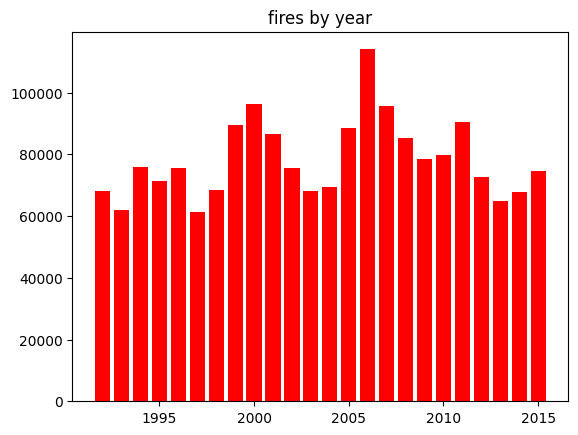

In [ ]:
# count of fires by year

x = range(1992, 2016)
h = df['FIRE_YEAR'].value_counts(sort=False).sort_index().to_list()

plt.bar(x, h, color='r')
plt.title('fires by year');


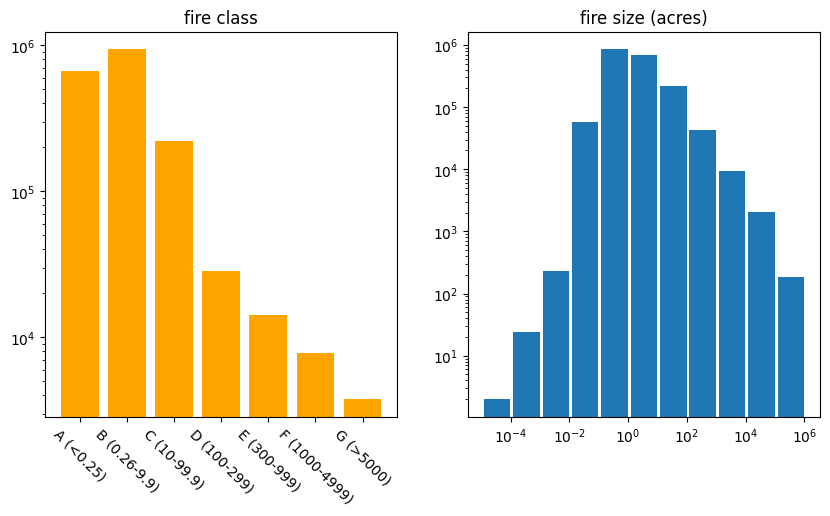

In [ ]:
# distribution of fires size, according to the class and the surface (acre)
# 1 ac = 4046,856 m²

x = range(len(df['FIRE_SIZE_CLASS'].unique()))
h = df['FIRE_SIZE_CLASS'].value_counts(sort=False).sort_index().to_list()
xlabels = ['A (<0.25)', 'B (0.26-9.9)', 'C (10-99.9)', 'D (100-299)', 'E (300-999)', 'F (1000-4999)', 'G (>5000)']

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.bar(x, h, color='orange')
plt.title('fire class')
plt.xticks(x, xlabels, rotation=-45)
plt.yscale('log')


plt.subplot(1,2,2)
bins = 10**(np.arange(-5,7, dtype='float'))
plt.hist(df['FIRE_SIZE'], bins=bins, rwidth=.95)
plt.title('fire size (acres)')
plt.xscale('log')
plt.yscale('log');


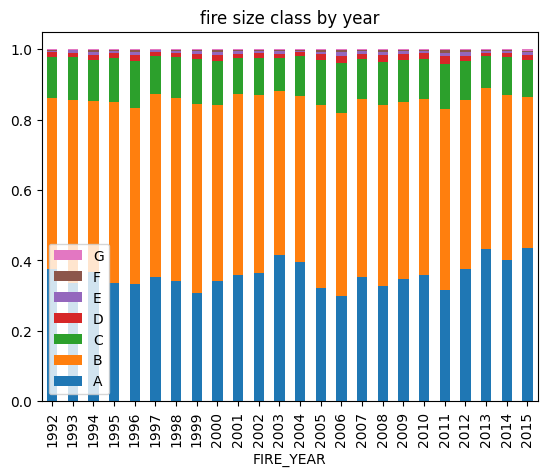

In [ ]:
# distribution of the fire size class by year

pd.crosstab(df['FIRE_YEAR'], df['FIRE_SIZE_CLASS'], normalize='index').plot(kind='bar', stacked=True, title='fire size class by year').legend(loc='best', reverse=True);


# **dates transformation**

In [ ]:
pd.to_datetime(33-1, unit='D', origin=pd.Timestamp('01-01-2025'))

Timestamp('2025-02-02 00:00:00')

In [ ]:
df["DISCO_DATE_1"] = pd.to_datetime(df["DISCOVERY_DATE"], origin='julian', unit='D')
#df["DISCO_DATE_2"] = pd.to_datetime(df["DISCOVERY_DOY"]-1, unit='D', origin=str(df["FIRE_YEAR"]).to_timestamp())
#df["DISCO_DATE_2"] = pd.to_datetime(df["DISCOVERY_DOY"], unit='D', origin=pd.Timestamp(df['FIRE_YEAR']))
#df['year'] = pd.Timestamp(df['FIRE_YEAR'])
df.iloc[2]

FOD_ID                                                                        3
FPA_ID                                                               FS-1418835
SOURCE_SYSTEM_TYPE                                                          FED
SOURCE_SYSTEM                                                       FS-FIRESTAT
NWCG_REPORTING_AGENCY                                                        FS
NWCG_REPORTING_UNIT_ID                                                  USCAENF
NWCG_REPORTING_UNIT_NAME                               Eldorado National Forest
SOURCE_REPORTING_UNIT                                                      0503
SOURCE_REPORTING_UNIT_NAME                             Eldorado National Forest
LOCAL_FIRE_REPORT_ID                                                         27
LOCAL_INCIDENT_ID                                                           021
FIRE_CODE                                                                  A32W
FIRE_NAME                               

In [ ]:
df['year'] = pd.Timestamp(df['FIRE_YEAR'])


TypeError: Cannot convert input [OBJECTID
1          2005
2          2004
3          2004
4          2004
5          2004
           ... 
1880461    2015
1880462    2015
1880463    2015
1880464    2015
1880465    2015
Name: FIRE_YEAR, Length: 1880465, dtype: int64] of type <class 'pandas.core.series.Series'> to Timestamp